In [0]:
import numpy as np
import sys
import pandas as pd


In [0]:
def fit_ridge_regression(X, Y, l):
    """
    Calculates and returns analityc solution for ridge regression.

    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param l: regularization parameter lambda
    :return: value of beta (1 dimensional np.array)
    """
    
    # TODO: Implement fit_ridge_regression (same as previous homeworks)
    
    #beta = np.zeros(X.shape[1])
    beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)-l),X.T),Y)
    return beta


In [0]:
def cost_function(X, Y, beta):
  
  m = Y.shape[0]
  #J = np.sum((X.dot(beta)-Y)**2)/2/m
  J = np.sqrt(np.sum((X.dot(beta)-Y)**2)/m)
  return J



In [0]:

def gradient_descent(X, Y, l, epsilon, step_size, max_steps):
    """
    Implement gradient descent using the value of the gradient
    divided by number of samples.

    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param l: regularization parameter lambda
    :param epsilon: approximation strength
    :param max_steps: maximum number of iterations before algorithm will
        terminate.
    :return: value of beta (1 dimensional np.array)
    """
    beta = np.zeros(X.shape[1])
    previous_beta= np.zeros(X.shape[1])
    #print X.shape[1]
    for s in range(max_steps):
        # TODO: Implement iterations.
        # Use normalized_gradient to calculate the gradient
        
        m = Y.shape[0]
        #print('size',m)
        
        hypothesis = X.dot(beta)
        #print('hypothesis', hypothesis.head())
        
        loss = hypothesis-Y
        #print('loss', loss.head())
        
        
        
        gradient = X.T.dot(loss)/m
        #print('gradient', gradient.head())
        
        beta = beta-step_size*gradient+l*beta
        #print('beta',beta)
        #print(max(beta -previous_beta) )
        
        diff = hypothesis-(X.dot(beta.T))
        #print('diff',diff.dot(diff.T))
       
        if (diff.dot(diff.T)) <epsilon:
         # print( max(abs(diff))) 
          print(diff.dot(diff.T),'is less then epsilon')
          break
        
       
    return beta

In [0]:
def ridge_loss_gradient(X, Y, beta, l):
    """
    This function calculates the gradient for ridge regression for
    parameter values beta.

    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    :param l: regularization parameter lambda
    :return: normalized gradient, i.e. gradient normalized according to data
    """
    # TODO: Implement
    return np.zeros(X.shape[1])

In [0]:

def loss(X, Y, beta):
    """
    Calculate sum of error squares divided by number of points.

    :param X: data matrix (2 dimensional np.array)
    :param Y: response variables (1 dimensional np.array)
    :param beta: value of beta (1 dimensional np.array)
    :return: 1/N * SUM (y - x beta)^2
    """
    #print(X.shape[0])
    #print(np.dot(X,beta.T))
    #print((Y - np.dot(X,beta.T)))
    #print((Y - np.dot(X,beta.T))**2)
    #print(np.sum((Y - np.dot(X,beta.T))**2))
    return  (1.0/X.shape[0]) * np.sum((Y - np.dot(X,beta.T))**2)
   

In [0]:
def d_dimensional_comparison(d, beta_star, num_points, sigma, l=1):
    # Generate data, no need to touch this code.
    beta_star = np.array(beta_star)
    X_list = [np.random.uniform(-1, 1, num_points) for _ in range(d)]
    X = np.column_stack(X_list)
    X = np.column_stack((np.ones(num_points), X))
    Y = np.random.normal(X.dot(beta_star), sigma)
   

    # Calculate analytic and gradient descent beta hats.
    beta_hat_analytic = fit_ridge_regression(X, Y, l=l)
    beta_hat_grad = gradient_descent(X, Y, l=l, epsilon=1e-8, step_size=1e-2,
                                     max_steps=10000)

    # Testing code for your esimates.
    if np.linalg.norm(beta_star - beta_hat_analytic) > 1.:
        print('Your analytical betas is too far apart from beta star')
        print('Analytical: ', beta_hat_analytic)
        print('Beta star: ', beta_star)
        

    if np.linalg.norm(beta_hat_grad - beta_hat_analytic) > 1e-4:
        print('Your gradient descent beta is too far apart from analytical '
              'solution')
        print('Beta gradient: ', beta_hat_grad)
        print('Analytical: ', beta_hat_analytic)
        

    l_a = loss(X, Y, beta_hat_analytic)
    l_gd = loss(X, Y, beta_hat_grad)
    if abs((l_a - l_gd) / l_a) > 1e-8:
        print('Your gradient and analytical losses are too far apart')
        print('analytical loss:', l_a)
        print('gradient loss:', l_gd)
        

    print('Passed')

In [13]:

if __name__ == '__main__':
    # Fist test the signature of your gradient descent function.
    #beta_est = gradient_descent(np.array([[1, 2], [1, 3], [1, 4], [1, 5]]),
    #                            np.array([2, 3, 4, 5.01]),
    #                            l=0,
    #                            epsilon=1e-4,
    #                            step_size=1e-3,
    #                            max_steps=2)
    beta_est = gradient_descent(np.array([[1, 2], [1, 3], [1, 4], [1, 5]]),
                                np.array([2, 3, 4, 5.01]),
                                l=.1,
                                epsilon=1e-8,
                                step_size=1e-3,
                                max_steps=10000)
    
    assert beta_est.shape == (2,)
    # Call comparison function with the given 5-dimensional beta (b0, ..., b5)
    beta5d = [1.5, 2.2, 3.5, 4.4, 1.1, 3.9]
    d_dimensional_comparison(5, beta5d, 200, 2, l=1)


Your analytical betas is too far apart from beta star
('Analytical: ', array([ 1.51674962,  2.72412898,  3.31226438,  4.799695  ,  1.30762335,
        4.62202503]))
('Beta star: ', array([ 1.5,  2.2,  3.5,  4.4,  1.1,  3.9]))
Passed


In [0]:
from google.colab import auth
auth.authenticate_user()

file_id = '11IxUEDdn3UgTl-5uxi-siJ5GS3b1U2h4'#created.get('id')

import io
from googleapiclient.http import MediaIoBaseDownload

from googleapiclient.discovery import build
drive_service = build('drive', 'v3') #4/-ztrYCQVSdiJRl0lnh12uWvCg02WHyNOUnJ90ex7BNE verification code




In [16]:
request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, done = downloader.next_chunk()
  
downloaded.seek(0)

0L

In [21]:
df = pd.read_csv(downloaded)

EmptyDataError: ignored

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 14 columns):
Unnamed: 0        6234 non-null int64
price             6234 non-null float64
condition         6234 non-null object
district          6234 non-null object
max_floor         6234 non-null int64
street            6234 non-null object
num_rooms         6234 non-null int64
region            6234 non-null object
area              6234 non-null float64
url               6234 non-null object
num_bathrooms     6234 non-null int64
building_type     6234 non-null object
floor             6234 non-null int64
ceiling_height    6234 non-null float64
dtypes: float64(3), int64(5), object(6)
memory usage: 681.9+ KB


In [23]:
df.head()

,Unnamed: 0,price,condition,district,max_floor,street,num_rooms,region,area,url,num_bathrooms,building_type,floor,ceiling_height
0,0,65000.0,good,Center,9,Vardanants St,3,Yerevan,80.0,http://www.myrealty.am/en/item/24032/3-senyaka...,1,panel,4,2.8
1,1,140000.0,newly repaired,Arabkir,10,Hr.Kochar St,4,Yerevan,115.0,http://www.myrealty.am/en/item/17599/4-senyaka...,1,monolit,2,3.0
2,2,97000.0,newly repaired,Center,10,Teryan St,2,Yerevan,72.0,http://www.myrealty.am/en/item/29472/2-senyaka...,1,panel,3,2.8
3,3,47000.0,good,Center,9,D. Demirchyan St,1,Yerevan,43.0,http://www.myrealty.am/en/item/37186/1-senyaka...,1,panel,9,2.8
4,4,51000.0,newly repaired,Center,14,Sayat Nova Ave,1,Yerevan,33.0,http://www.myrealty.am/en/item/37184/1-senyaka...,1,other,4,2.8


In [0]:
#i = np.random.randint(0,N,np.int(N*.8))


In [0]:
# 1. categorical poxel tvayini 2. ambohji hamar gradient descent ashxatacnel u stanal Beta vori depqum lossy <30000 #df.iloc[25088]

dfX = df.drop('condition',axis=1).drop('url',axis=1).drop('street',axis=1).drop('building_type',axis=1).drop('Unnamed: 0',axis=1).drop('price',axis=1).drop('district',axis=1).drop('region',axis=1).copy()
dfY = df['price']



In [30]:
dfX.head()

,district,max_floor,num_rooms,area,num_bathrooms,floor,ceiling_height
0,Center,9,3,80.0,1,4,2.8
1,Arabkir,10,4,115.0,1,2,3.0
2,Center,10,2,72.0,1,3,2.8
3,Center,9,1,43.0,1,9,2.8
4,Center,14,1,33.0,1,4,2.8


In [32]:
dfY.head()

0     65000.0
1    140000.0
2     97000.0
3     47000.0
4     51000.0
Name: price, dtype: float64

In [0]:
ones= pd.DataFrame(data = np.ones(dfX.index.size))
#ones.info


In [35]:
dfX = pd.concat([ones,dfX],  axis = 1)
dfX.head()

,0,max_floor,num_rooms,area,num_bathrooms,floor,ceiling_height
0,1.0,9,3,80.0,1,4,2.8
1,1.0,10,4,115.0,1,2,3.0
2,1.0,10,2,72.0,1,3,2.8
3,1.0,9,1,43.0,1,9,2.8
4,1.0,14,1,33.0,1,4,2.8


In [38]:
 #beta_hat_grad = gradient_descent(dfX, dfY, l=.0001, epsilon=1e-3, step_size=2.7e-8, max_steps=500)
beta_hat_grad = gradient_descent(dfX, dfY, l=0, epsilon=1e-2, step_size=25e-5, max_steps=30000)
print('gradient descent RMSE:',cost_function(dfX, dfY, beta_hat_grad))
print('gradient descent MSE:', loss(dfX, dfY, beta_hat_grad))

('gradient descent RMSE:', 38836.796675279846)
('gradient descent MSE:', 1508296775.9970274)


In [39]:
beta_hat_grad 

0                 -5137.277042
max_floor          -495.069843
num_rooms        -16276.391956
area               1559.813741
num_bathrooms     14909.462523
floor                91.978200
ceiling_height    -1763.401727
dtype: float64

In [0]:
#print((dfY-np.dot(dfX,beta_hat_grad)))

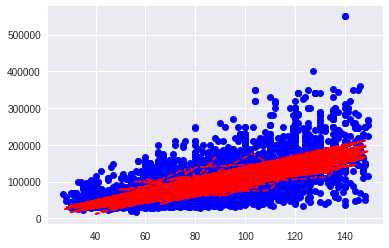

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(dfX['area'], dfY, 'bo')
plt.plot(dfX['area'], (np.dot(dfX,beta_hat_grad)), 'r--')